In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings
import os

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

warnings.filterwarnings('ignore')

# 범주형 변수

In [2]:
adult_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult'

In [3]:
adult_data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                 header=None, index_col=False,
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                       'martial-status', 'occupation', 'relationship', 'race', 'gender',
                       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                       'income'])

## 원-핫-인코딩(가변수)

범주형 변수를 표현하는 데 가장 널리 쓰이는 방법은 원-핫-인코딩(one-hot-encoding)이다.<br>
이를 one-out-of-N encoding 혹은 가변수(dummy variable)라고도 한다.<br>
가변수는 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성을 바꾼 것.<br>
0과 1로 표현된 변수는 선형 이진 분류 공식에 적용할 수 있어서, 다음과 같이 개수에 상관없이 범주마다 하나의 특성으로 표현한다.



In [4]:
# 예제를 위해 몇 개의 열만 선택한다.
data = adult_data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
                  'occupation', 'income']]

In [5]:
data.head(10)

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


In [6]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [7]:
print(f"original Feature: {list(data.columns)} \n")

data_dummies = pd.get_dummies(data)

print(f"get_dummies 후의 특성: \n{list(data_dummies.columns)}")

original Feature: ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성: 
['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'oc

In [8]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
# Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

print(f"X.shpae: {X.shape}, y.shape:{y.shape}")

X.shpae: (32561, 44), y.shape:(32561,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

print(f"Test Score: {logreg.score(X_test, y_test): .2f}")

Test Score:  0.81


In [11]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                       '범주형 특성': ['양말', '여우', '양말', '상자']})

In [12]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [13]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주현 변수 다루기

In [14]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False 로 설정하면 OHE가 희소 행렬이 아닌 NumPy 배열로 반환
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [15]:
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


In [16]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


ColumnsTransformer로 OneHotEncoding과 Scaling까지 동시에 할 수 있다?!

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False),
    ['workclass', 'education', 'gender', 'occupation'])]
)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# income을 제외한 모든 열을 추출
data_features = data.drop('income', axis=1)

In [19]:
# 데이터프레임과 income을 분할

X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0
)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


하나의 변환기로 모든 전처리 단계를 캡슐화하면 장점이 더 있다고 한다..
뭘까?

In [20]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)

print(f"Test Score: {logreg.score(X_test_trans, y_test): .2f}")

Test Score:  0.81


In [21]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

## make_column_transformer로 간편하게 ColumnTransformer 만들기

In [22]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
)

## 구간 분할, 이산화 그리고 선형 모델, 트리 모델

데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다르다.<br>
아주 폭 넓게 사용하는 두 알고리즘인 선형 모델과 트리 기반 모델(결정 트리, 그레이디언트 부스팅 트리, 랜덤 포레스트 등)은 특성의 표현 방식으로 인해 미치는 영향이 매우 다르다 !!<br>


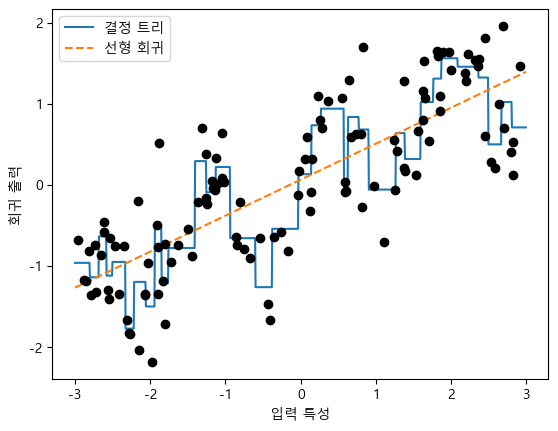

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print(f"bin edges: \n{kb.bin_edges_}")

bin edges: 
[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [25]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [26]:
print(X[:10])
print(X_binned.toarray()[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Text(0.5, 0, '입력 특성')

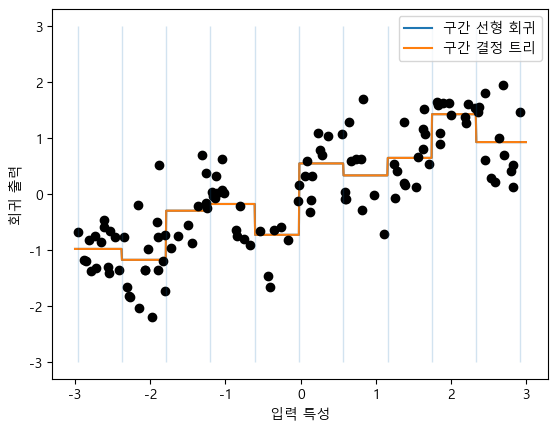

In [27]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')

plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

## 상호작용과 다항식

특별히 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 것.<br>
이런 종류의 특성 공학은 통게적 모델링에서 자주 사용하지만 일반적인 머신러닝 App에서도 많이 적용한다



In [28]:
X_combined = np.hstack([X, X_binned])

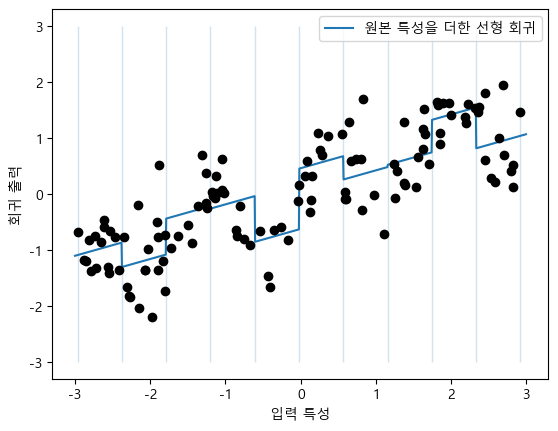

In [34]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:, 0], y, 'o', c='k')

In [36]:
X_product = np.hstack([X_binned, X * X_binned])

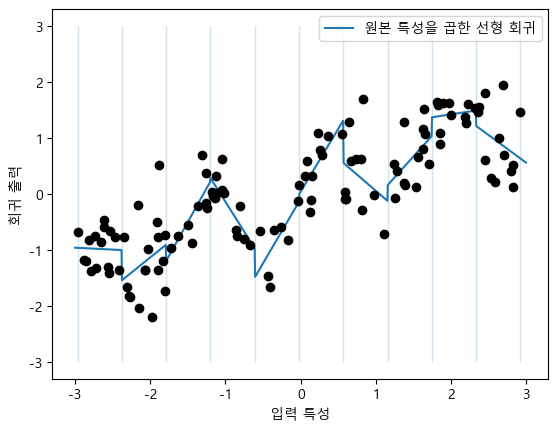

In [37]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [41]:
print("X 원소: \n", X[:5])
print("X_poly 원소: \n", X_poly[:5])

X 원소: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소: 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [42]:
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀(polynomial regression) 모델이 된다.

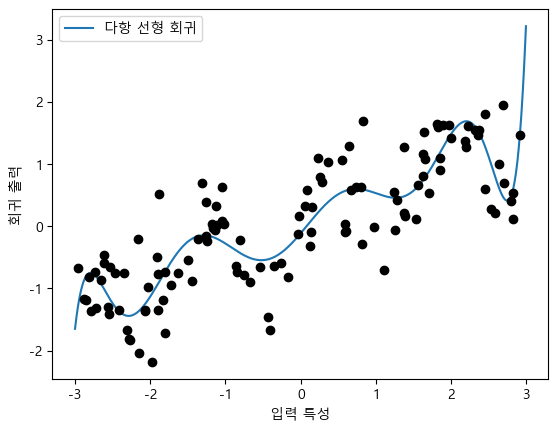

In [44]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label="다항 선형 회귀")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

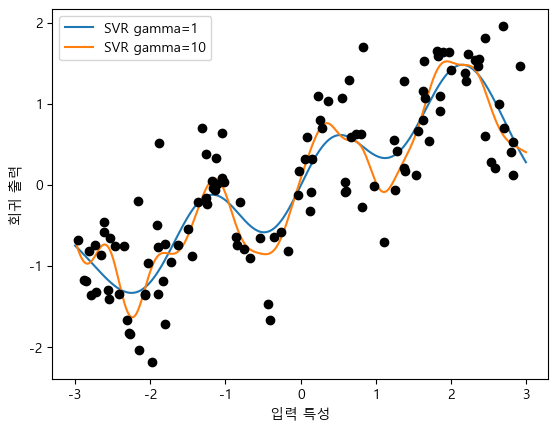

In [45]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [46]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [49]:
print(f"다항 특성 이름:\n {poly.get_feature_names()}")

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [51]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

print(f"Non poly => {ridge.score(X_test_scaled, y_test) : .3f}")

ridge = Ridge().fit(X_train_poly, y_train)
print(f"poly => {ridge.score(X_test_poly, y_test) : .3f}")

Non poly =>  0.621
poly =>  0.753


In [54]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print(f"Non poly => {rf.score(X_test_scaled, y_test) : .3f}")

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print(f"poly => {rf.score(X_test_poly, y_test) : .3f}")

Non poly =>  0.795
poly =>  0.775


## 일변량 비선형 변환

제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨을 보았다.<br>

한편 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다.

트리 기반 모델은 특성의 순서에만 영향을 받지만, 